In [1]:
# TODO drop Kherson point
# TODO investigate Unnamed

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
SEED = 14

In [24]:
initial_data = pd.read_csv("data_source/data.csv")
print(initial_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   hotspot_id              6011 non-null   object
 1   blacklist_score         6011 non-null   object
 2   static_score            6011 non-null   object
 3   dynamic_score           6011 non-null   object
 4   connection_stats_score  6011 non-null   object
 5   last_conn_date          6011 non-null   object
 6   last_seen_date          6011 non-null   object
 7   num_conn                6011 non-null   object
 8   unique_conn             6011 non-null   object
 9   percent_available       6011 non-null   object
 10  percent_protected       6011 non-null   object
 11  enabled_moderator       6011 non-null   object
dtypes: object(12)
memory usage: 563.7+ KB
None


## Clean data

In [5]:
data = initial_data.copy()

In [6]:
initial_data.nunique()

hotspot_id                6004
blacklist_score              3
static_score                80
dynamic_score               91
connection_stats_score      23
last_conn_date            2244
last_seen_date            2060
num_conn                   616
unique_conn                 58
percent_available            3
percent_protected           58
enabled_moderator            3
dtype: int64

In [7]:
initial_data["enabled_moderator"].value_counts()

False                5916
True                   94
enabled_moderator       1
Name: enabled_moderator, dtype: int64

In [8]:
data["blacklist_score"].value_counts()

0.000000           5913
1.000000             97
blacklist_score       1
Name: blacklist_score, dtype: int64

In [9]:
data[data["blacklist_score"] == "blacklist_score"]

,hotspot_id,blacklist_score,static_score,dynamic_score,connection_stats_score,last_conn_date,last_seen_date,num_conn,unique_conn,percent_available,percent_protected,enabled_moderator
143,hotspot_id,blacklist_score,static_score,dynamic_score,connection_stats_score,last_conn_date,last_seen_date,num_conn,unique_conn,percent_available,percent_protected,enabled_moderator


In [10]:
data.drop(index = 143, inplace = True)

In [11]:
data[data["blacklist_score"] == "blacklist_score"]

,hotspot_id,blacklist_score,static_score,dynamic_score,connection_stats_score,last_conn_date,last_seen_date,num_conn,unique_conn,percent_available,percent_protected,enabled_moderator


In [12]:
data

,hotspot_id,blacklist_score,static_score,dynamic_score,connection_stats_score,last_conn_date,last_seen_date,num_conn,unique_conn,percent_available,percent_protected,enabled_moderator
0,14650480,0.000000,0.220000,0.450000,0.690000,2022-08-21,2021-05-01,5,2,1.000000,1.000000,False
1,14110275,0.000000,0.220000,0.000000,0.670000,2022-02-04,2022-02-04,4,2,1.000000,1.000000,False
2,16012785,0.000000,0.180000,0.160000,0.670000,2022-02-05,2022-02-15,4,2,1.000000,1.000000,False
3,14863945,0.000000,0.220000,0.050000,0.720000,2022-03-15,2021-06-12,6,2,1.000000,0.800000,False
4,9295867,0.000000,0.390000,0.000000,0.520000,2017-12-07,2017-12-07,1,1,1.000000,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6006,13213372,0.000000,0.250000,0.000000,0.520000,2020-04-27,2020-04-27,1,1,1.000000,0.000000,False
6007,5504114,0.000000,0.220000,0.000000,0.520000,2016-04-10,2022-01-02,1,1,1.000000,0.000000,False
6008,15109612,0.000000,0.480000,0.000000,0.520000,2021-07-20,2021-07-20,1,1,1.000000,0.000000,False
6009,502326,0.000000,0.120000,0.000000,0.520000,2013-11-19,2013-11-19,1,1,1.000000,0.000000,False


### Cast Types


In [13]:
int_columns = ["hotspot_id", "num_conn", "unique_conn"]
float_columns = ["blacklist_score", "static_score", "dynamic_score", "connection_stats_score", "percent_available", "percent_protected"]
bool_columns = ["enabled_moderator"]
date_columns = ["last_conn_date", "last_seen_date"]


In [14]:
for column in int_columns:
    data[column] = data[column].astype(int)
for column in float_columns:
    data[column] = data[column].astype(float)
for column in bool_columns:
    data[column] = data[column].apply(lambda x: True if x == "True" else False).astype(bool).astype(int)
for column in date_columns:
    data[column] = data[column].astype('datetime64[ns]')

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6010
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hotspot_id              6010 non-null   int64         
 1   blacklist_score         6010 non-null   float64       
 2   static_score            6010 non-null   float64       
 3   dynamic_score           6010 non-null   float64       
 4   connection_stats_score  6010 non-null   float64       
 5   last_conn_date          6010 non-null   datetime64[ns]
 6   last_seen_date          6010 non-null   datetime64[ns]
 7   num_conn                6010 non-null   int64         
 8   unique_conn             6010 non-null   int64         
 9   percent_available       6010 non-null   float64       
 10  percent_protected       6010 non-null   float64       
 11  enabled_moderator       6010 non-null   int64         
dtypes: datetime64[ns](2), float64(6), int64(4)
memor

In [16]:
data["enabled_moderator"].value_counts(dropna = False)

0    5916
1      94
Name: enabled_moderator, dtype: int64

In [ ]:
initial_data["enabled_moderator"].value_counts(dropna = False)

False                5916
True                   94
enabled_moderator       1
Name: enabled_moderator, dtype: int64

### Duplicates

In [19]:
counts = data["hotspot_id"].value_counts()
duplicates = counts[counts > 1].index.to_list()
duplicates

[14560437, 16616145, 16571148, 6531204, 16577029, 13990398, 16190341]

In [20]:
data[data["hotspot_id"].isin(duplicates)].sort_values("hotspot_id")

,hotspot_id,blacklist_score,static_score,dynamic_score,connection_stats_score,last_conn_date,last_seen_date,num_conn,unique_conn,percent_available,percent_protected,enabled_moderator
998,6531204,0.0,0.37,0.90,0.90,2022-09-02,2022-07-16,151,11,1.0,0.61,0
5519,6531204,0.0,0.37,0.90,0.90,2022-09-02,2022-07-16,151,11,1.0,0.61,0
921,13990398,0.0,0.52,0.90,0.90,2022-09-02,2022-07-13,89,6,1.0,1.00,0
5339,13990398,0.0,0.52,0.90,0.90,2022-09-02,2022-07-13,89,6,1.0,1.00,0
1131,14560437,0.0,0.33,0.90,0.90,2022-09-02,2022-07-24,756,8,1.0,1.00,0
4705,14560437,0.0,0.33,0.90,0.90,2022-09-02,2022-07-24,756,8,1.0,1.00,0
1083,16190341,0.0,0.22,0.90,0.90,2022-09-02,2022-03-31,16,7,1.0,0.00,0
1941,16190341,0.0,0.22,0.90,0.90,2022-09-02,2022-03-31,16,7,1.0,0.00,0
862,16571148,0.0,0.37,0.57,0.78,2022-09-02,2022-07-25,73,2,1.0,1.00,0
3101,16571148,0.0,0.37,0.57,0.78,2022-09-02,2022-07-25,73,2,1.0,1.00,0


In [21]:
data.drop_duplicates(data.columns, inplace = True)

In [22]:
counts = data["hotspot_id"].value_counts()
duplicates = counts[counts > 1].index.to_list()
duplicates

[]

In [23]:
data.nunique()

hotspot_id                6003
blacklist_score              2
static_score                79
dynamic_score               90
connection_stats_score      22
last_conn_date            2243
last_seen_date            2059
num_conn                   615
unique_conn                 57
percent_available            2
percent_protected           57
enabled_moderator            2
dtype: int64

### Save

In [38]:
data.to_parquet("cleaned_data/data.parquet")

In [39]:
df = pd.read_parquet("cleaned_data/data.parquet")
print(df.info())
del df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6010
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hotspot_id              6010 non-null   int64         
 1   blacklist_score         6010 non-null   float64       
 2   static_score            6010 non-null   float64       
 3   dynamic_score           6010 non-null   float64       
 4   connection_stats_score  6010 non-null   float64       
 5   last_conn_date          6010 non-null   datetime64[ns]
 6   last_seen_date          6010 non-null   datetime64[ns]
 7   num_conn                6010 non-null   int64         
 8   unique_conn             6010 non-null   int64         
 9   percent_available       6010 non-null   float64       
 10  percent_protected       6010 non-null   float64       
 11  enabled_moderator       6010 non-null   bool          
dtypes: bool(1), datetime64[ns](2), float64(6), int64

### Analysis

In [19]:
data.nunique()

hotspot_id                6003
blacklist_score              2
static_score                79
dynamic_score               90
connection_stats_score      22
last_conn_date            2243
last_seen_date            2059
num_conn                   615
unique_conn                 57
percent_available            2
percent_protected           57
enabled_moderator            2
dtype: int64

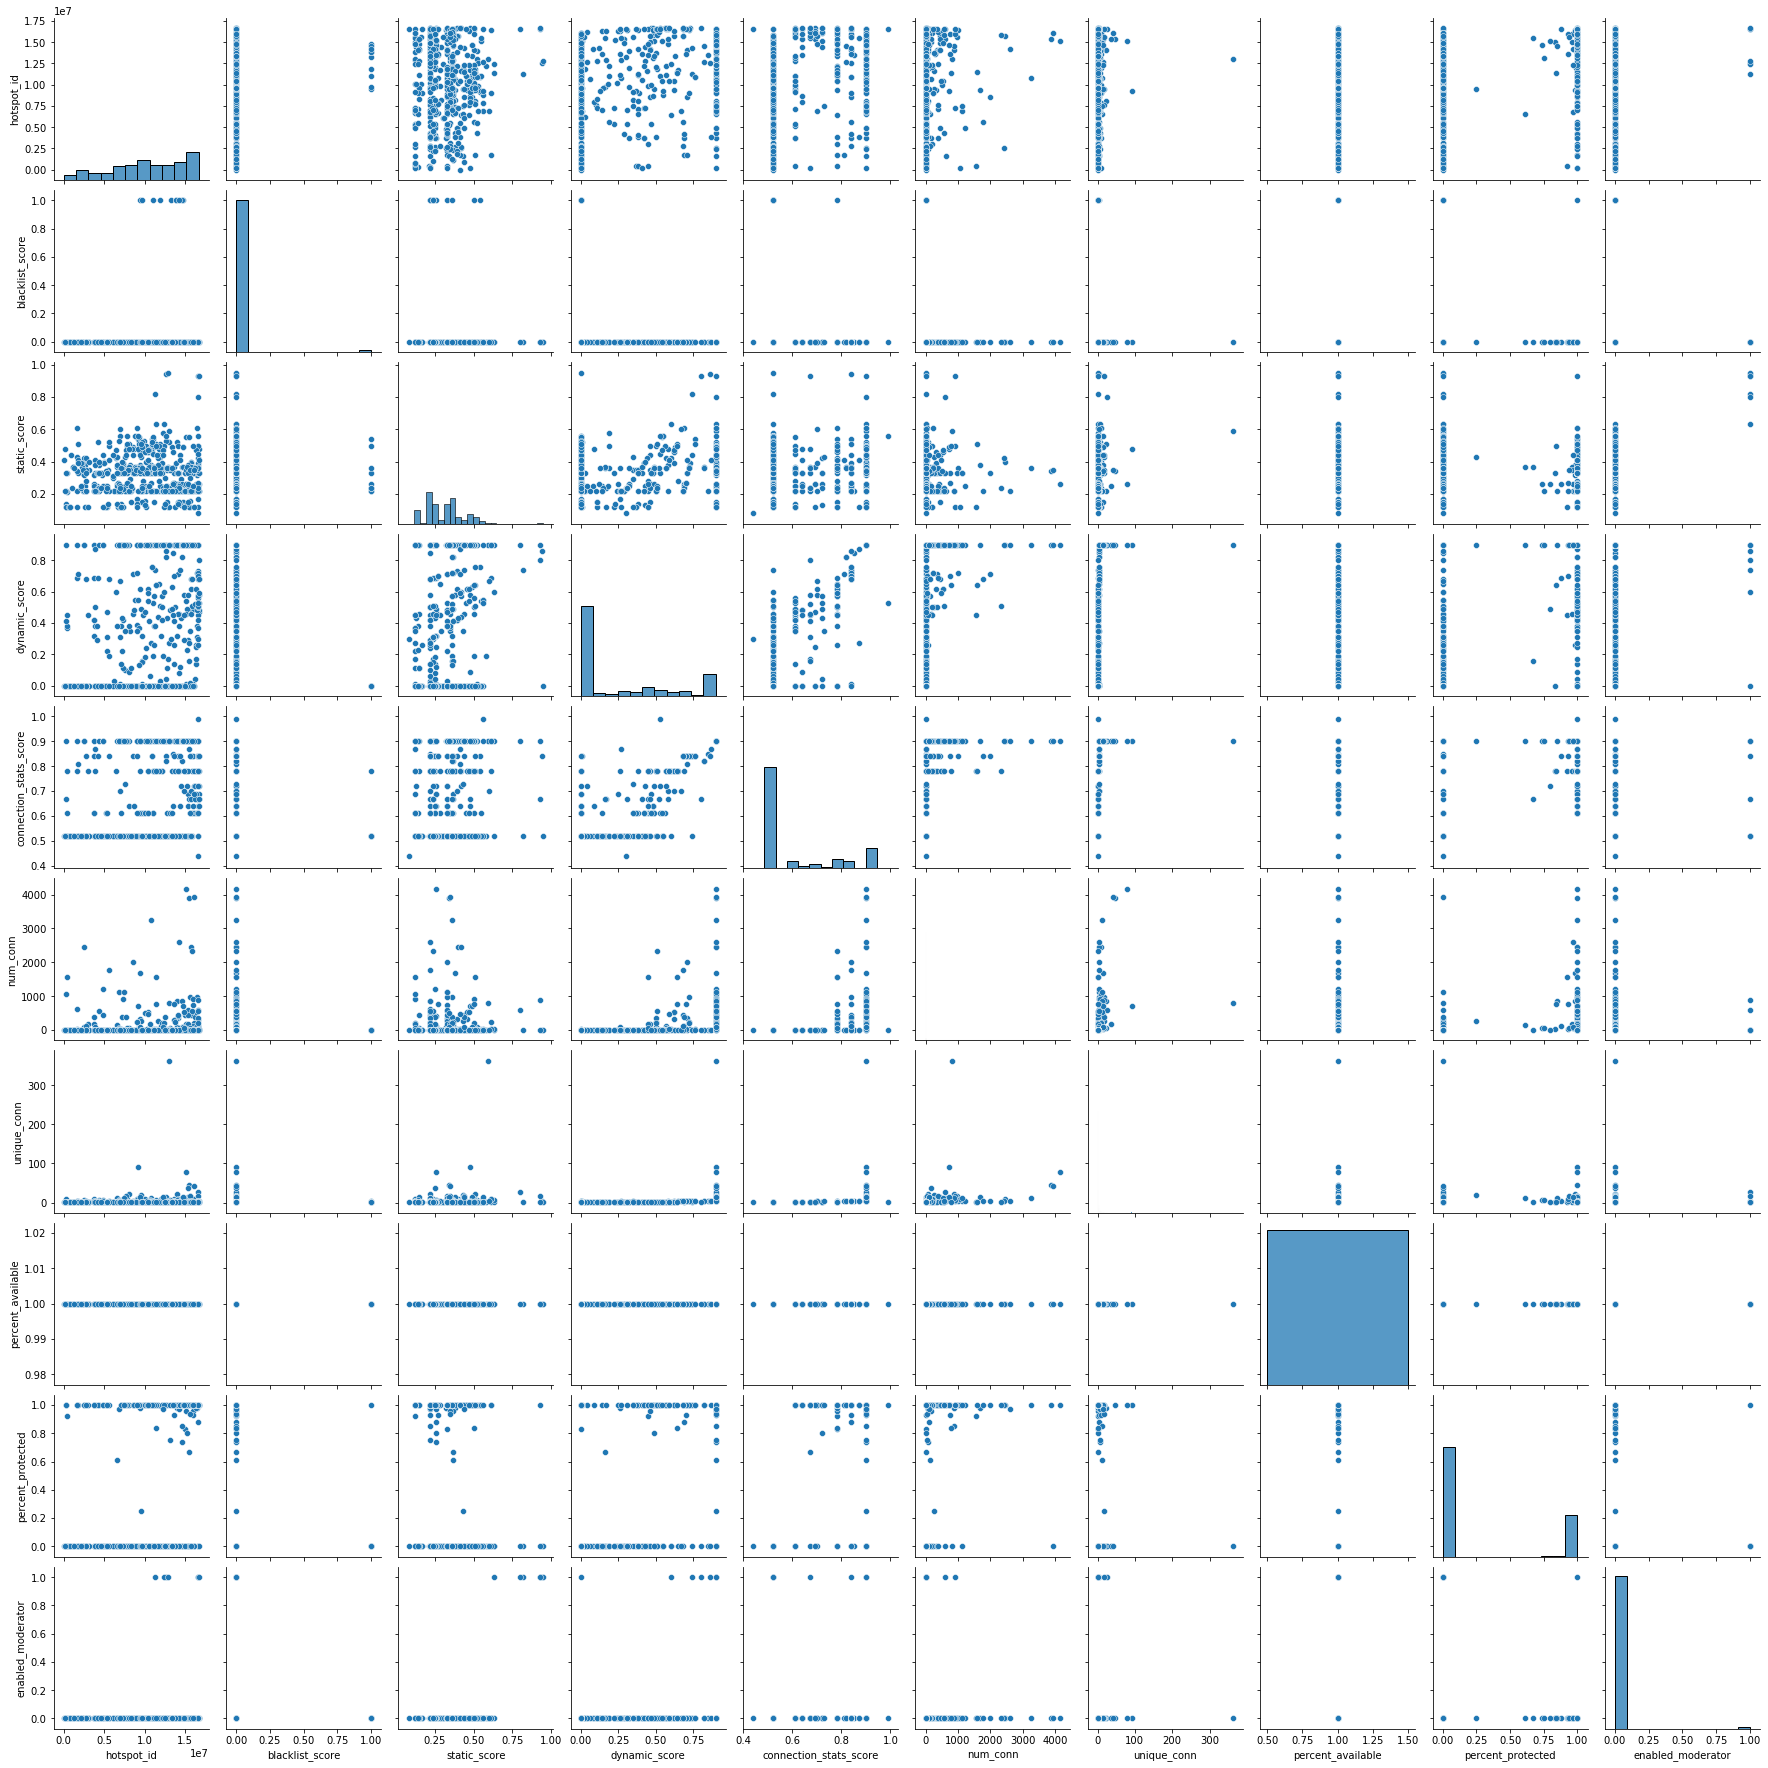

In [20]:
sns.pairplot(data.sample(frac = 0.1, random_state = SEED))
